In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from datetime import datetime, date

import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
path = r"C:\Users\mzhong\Desktop\Cineplex_Case_Study.xlsx"
df = pd.read_excel(path, sheet_name='Case Study Data Complete')

In [3]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)
df.head(100)

,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_CITY,HOME_ADDRESS_PROVINCE_CODE,HOME_ADDRESS_REGION_CODE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,LAST_RATIO_CHG_DATE,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,DATE_OF_RESPONSE,CONTROL_FLAG,TEST_ACCOUNT_FLAG
0,14089420521,A,O,1997-04-11,1973-06-10 00:00:00,F,E,-1,KESWICK RIDGE,NB,A,Y,14266,14251,15,0,2014-06-02,Y,3788,1353,1.0,1.0,Y,2018-02-28,N,N
1,18507021933,A,B,2013-05-03,1994-05-23 00:00:00,F,E,0,MARKHAM,ON,O,Y,364,284,80,100,2019-07-19,Y,20,1,1.0,0.0,Y,2018-02-26,N,Y
2,15139470171,A,B,2015-07-14,1996-05-05 00:00:00,F,E,-1,SCARBOROUGH,ON,O,Y,88,0,88,100,2015-07-14,Y,23,6,0.0,1.0,Y,2018-02-20,N,N
3,12883629783,A,B,2015-07-14,1996-05-05 00:00:00,F,E,-1,SCARBOROUGH,ON,O,Y,88,0,88,100,2015-07-14,Y,23,6,0.0,1.0,Y,2018-02-24,N,N
4,12371682557,A,G,2017-07-26,1978-07-07 00:00:00,F,E,-1,VICTORIA,BC,W,Y,1321,1219,102,50,2017-07-27,Y,150,732,0.0,0.0,Y,2018-02-26,N,N
5,11030609605,A,G,1993-09-21,1962-04-01 00:00:00,NaN,E,2,ROSEAU RIVER,MB,W,Y,4416,4416,0,0,NaT,Y,93,199,0.0,1.0,Y,2018-02-24,N,N
6,17275436755,A,O,1994-12-08,1973-08-16 00:00:00,F,E,-1,VICTORIA,BC,W,Y,16246,16246,0,0,NaT,Y,2544,2139,1.0,1.0,Y,2018-02-22,N,N
7,11876853188,A,B,1995-09-19,1969-12-10 00:00:00,F,E,1,NEW WESTMINSTER,BC,W,Y,197,197,0,0,NaT,Y,138,14,0.0,NaN,Y,2018-02-19,N,N
8,10148763171,A,G,2004-12-03,1985-09-17 00:00:00,F,F,0,EAST FARNHAM,QC,Q,Y,2116,35,2081,100,2014-04-23,Y,138,663,1.0,1.0,Y,2018-02-19,N,N
9,15716522324,A,B,2005-09-21,1979-03-20 00:00:00,NaN,E,-1,HAMILTON,ON,O,Y,116,10,106,100,2012-03-02,Y,128,157,0.0,1.0,Y,2018-02-20,N,N


In [4]:
print(df.shape)

(8598, 26)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8598 entries, 0 to 8597
Data columns (total 26 columns):
UNIQUE_COLLECTOR_ID           8598 non-null int64
ACCOUNT_STATUS                8598 non-null object
COLLECTOR_TIER                8598 non-null object
ENROLLMENT_DATE               8598 non-null datetime64[ns]
BIRTHDATE                     8598 non-null object
GENDER                        6723 non-null object
LANGUAGE                      8598 non-null object
HOUSEHOLD_INCOME_CATEGORY     8598 non-null int64
HOME_ADDRESS_CITY             8598 non-null object
HOME_ADDRESS_PROVINCE_CODE    8598 non-null object
HOME_ADDRESS_REGION_CODE      8598 non-null object
PROMO_MAILABLE_FLAG           8598 non-null object
ACCOUNT_BALANCE               8598 non-null int64
DREAM_ACCOUNT_BALANCE         8598 non-null int64
CASH_ACCOUNT_BALANCE          8598 non-null int64
CASH_RATIO                    8598 non-null int64
LAST_RATIO_CHG_DATE           6006 non-null datetime64[ns]
EMAIL_OPT_IN_FLA

In [6]:
# Data Cleaning - Datatime
df.loc[df.BIRTHDATE=='0001-01-01', "BIRTHDATE"]=pd.Timestamp('now')

In [12]:
# Data Cleaning - Data Type: change data type for multiple columns
df = df.astype({"UNIQUE_COLLECTOR_ID":'object', "BIRTHDATE":'datetime64[ns]', "HOUSEHOLD_INCOME_CATEGORY":'object', "WEB_ACTIVE_30DAYS":'object', "EMAIL_ENGAGED_30DAYS":'object'})

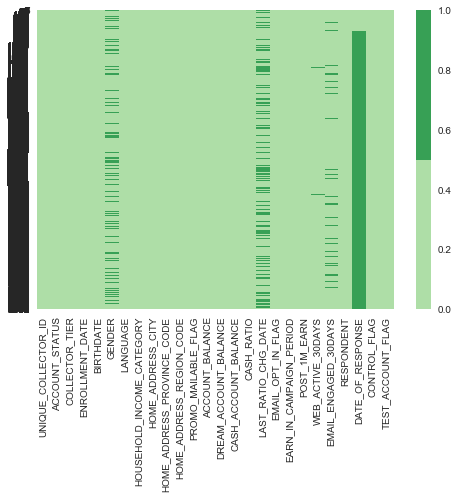

In [8]:
my_cmap = ListedColormap(sns.color_palette('Greens', 2).as_hex())
sns.heatmap(df.isnull(), cmap=my_cmap)
plt.show()

In [9]:
# Data Cleaning - Missing Data: check size / proportion
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

UNIQUE_COLLECTOR_ID - 0.0%
ACCOUNT_STATUS - 0.0%
COLLECTOR_TIER - 0.0%
ENROLLMENT_DATE - 0.0%
BIRTHDATE - 0.0%
GENDER - 22.0%
LANGUAGE - 0.0%
HOUSEHOLD_INCOME_CATEGORY - 0.0%
HOME_ADDRESS_CITY - 0.0%
HOME_ADDRESS_PROVINCE_CODE - 0.0%
HOME_ADDRESS_REGION_CODE - 0.0%
PROMO_MAILABLE_FLAG - 0.0%
ACCOUNT_BALANCE - 0.0%
DREAM_ACCOUNT_BALANCE - 0.0%
CASH_ACCOUNT_BALANCE - 0.0%
CASH_RATIO - 0.0%
LAST_RATIO_CHG_DATE - 30.0%
EMAIL_OPT_IN_FLAG - 0.0%
EARN_IN_CAMPAIGN_PERIOD - 0.0%
POST_1M_EARN - 0.0%
WEB_ACTIVE_30DAYS - 1.0%
EMAIL_ENGAGED_30DAYS - 7.0%
RESPONDENT - 0.0%
DATE_OF_RESPONSE - 93.0%
CONTROL_FLAG - 0.0%
TEST_ACCOUNT_FLAG - 0.0%


In [10]:
# Data Cleaning - Missing Data: replace the missing for categorical columns
df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('NaN'))

In [13]:
# Data Cleaning - Outliers: check existence
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

df_numeric.describe()

,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN
count,8598.000000,8598.000000,8598.000000,8598.000000,8598.000000,8598.000000
mean,3831.635031,3485.338683,346.296348,44.844150,539.319726,344.342522
std,7838.016748,7722.192018,1165.889585,47.462714,1135.501012,658.989824
min,-312.000000,0.000000,-312.000000,0.000000,-1145.000000,-1079.000000
25%,336.000000,126.000000,0.000000,0.000000,43.000000,12.000000
50%,1304.000000,946.000000,32.500000,10.000000,162.500000,53.000000
75%,4220.500000,3745.500000,134.750000,100.000000,556.000000,319.750000
max,271188.000000,271188.000000,33335.000000,100.000000,30213.000000,19699.000000


In [14]:
# Data Cleaning - Duplicates: check existence
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [UNIQUE_COLLECTOR_ID, ACCOUNT_STATUS, COLLECTOR_TIER, ENROLLMENT_DATE, BIRTHDATE, GENDER, LANGUAGE, HOUSEHOLD_INCOME_CATEGORY, HOME_ADDRESS_CITY, HOME_ADDRESS_PROVINCE_CODE, HOME_ADDRESS_REGION_CODE, PROMO_MAILABLE_FLAG, ACCOUNT_BALANCE, DREAM_ACCOUNT_BALANCE, CASH_ACCOUNT_BALANCE, CASH_RATIO, LAST_RATIO_CHG_DATE, EMAIL_OPT_IN_FLAG, EARN_IN_CAMPAIGN_PERIOD, POST_1M_EARN, WEB_ACTIVE_30DAYS, EMAIL_ENGAGED_30DAYS, RESPONDENT, DATE_OF_RESPONSE, CONTROL_FLAG, TEST_ACCOUNT_FLAG]
Index: []


In [15]:
# Data Cleaning - Inactive Accounts: check size / proportion
inactive_accounts = df[df['ACCOUNT_STATUS']=='I'].UNIQUE_COLLECTOR_ID.count()
print('Number of Users whose account inactive: ', inactive_accounts)

# Data Cleaning - Inactive Accounts: visualize inactive accounts
inactive_accounts_data = df[df['ACCOUNT_STATUS']=='I']
inactive_accounts_data

Number of Users whose account inactive:  4


,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_CITY,HOME_ADDRESS_PROVINCE_CODE,HOME_ADDRESS_REGION_CODE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,LAST_RATIO_CHG_DATE,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,DATE_OF_RESPONSE,CONTROL_FLAG,TEST_ACCOUNT_FLAG
3174,13829386579,I,B,2002-06-03,1962-06-22,M,E,-1,OTTAWA,ON,O,N,69,5,64,100,2012-08-30 00:00:00,Y,46,14,0,1,N,NaN,N,N
6288,10077247158,I,G,2001-11-10,1965-12-04,M,E,-1,SAINT JOHN,NB,A,N,0,0,0,100,2017-09-23 00:00:00,Y,206,284,0,1,N,NaN,N,N
6352,17106338437,I,O,2010-08-05,1966-01-06,NaN,E,-1,SHERWOOD PARK,AB,W,N,0,0,0,0,NaN,Y,1240,596,0,0,N,NaN,N,N
8571,13581909430,I,B,2015-02-17,1982-07-25,F,F,-1,LEVIS,QC,Q,N,52,52,0,0,2015-02-17 00:00:00,Y,1,3,NaN,0,N,NaN,N,N


In [16]:
# Data Cleaning - Inactive Accounts: remove inactive accounts
ind_test = df[df['ACCOUNT_STATUS']=='I'].index
df= df.drop(ind_test, axis=0)

print(df.shape)

(8594, 26)


In [17]:
# Data Cleaning - Test Accounts: check size / proportion
test_accounts = df[df['TEST_ACCOUNT_FLAG']=='Y'].UNIQUE_COLLECTOR_ID.count()
print('Number of Users whose account test: ', test_accounts)

# Data Cleaning - Test Accounts: remove test accounts
ind_test = df[df['TEST_ACCOUNT_FLAG']=='Y'].index
df= df.drop(ind_test, axis=0)

print(df.shape)

Number of Users whose account test:  2
(8592, 26)


In [18]:
# Data Cleaning - Users who in control group but receive treatment: check size / proportion
control_group_responde = df[(df['CONTROL_FLAG']=='Y') & (df['RESPONDENT']=='Y')].UNIQUE_COLLECTOR_ID.count()
print('Number of Users who in control group but receive treatment: ', control_group_responde)

# Data Cleaning - Users who in control group but receive treatment: visualize data
control_group_responde_data = df[(df['CONTROL_FLAG']=='Y') & (df['RESPONDENT']=='Y')]
control_group_responde_data

Number of Users who in control group but receive treatment:  25


,UNIQUE_COLLECTOR_ID,ACCOUNT_STATUS,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,LANGUAGE,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_CITY,HOME_ADDRESS_PROVINCE_CODE,HOME_ADDRESS_REGION_CODE,PROMO_MAILABLE_FLAG,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,LAST_RATIO_CHG_DATE,EMAIL_OPT_IN_FLAG,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN,WEB_ACTIVE_30DAYS,EMAIL_ENGAGED_30DAYS,RESPONDENT,DATE_OF_RESPONSE,CONTROL_FLAG,TEST_ACCOUNT_FLAG
141,11755181121,A,B,2001-12-29,1971-08-08,F,E,1,HALIFAX,NS,A,Y,285,243,42,100,2014-03-10 00:00:00,Y,65,19,0,1,Y,2018-02-28 00:00:00,Y,N
142,15431547964,A,B,2003-02-13,1979-08-08,F,F,2,SAINT-EUSTACHE,QC,Q,Y,567,562,5,100,2015-05-20 00:00:00,Y,14,11,0,1,Y,2018-02-24 00:00:00,Y,N
143,13501721924,A,B,2003-03-01,1950-03-29,F,E,2,SHEDIAC CAPE,NB,A,Y,1833,1820,13,0,2015-02-20 00:00:00,Y,159,47,0,0,Y,2018-02-24 00:00:00,Y,N
150,17403466695,A,B,1995-12-16,1962-12-31,NaN,E,2,NORTH YORK,ON,O,Y,542,528,14,100,2018-06-14 00:00:00,Y,1,1,1,1,Y,2018-02-26 00:00:00,Y,N
185,12302024349,A,G,2012-05-07,1993-06-24,F,E,-1,YORK,ON,O,Y,843,697,146,100,2017-08-21 00:00:00,Y,410,26,1,1,Y,2018-02-20 00:00:00,Y,N
186,16763517069,A,B,2014-04-12,1987-12-16,F,E,-1,BANFF,AB,W,Y,104,21,83,100,2014-07-04 00:00:00,Y,1,3,0,1,Y,2018-02-24 00:00:00,Y,N
187,16321511757,A,B,2015-02-21,1984-02-19,F,E,-1,GRANDE PRAIRIE,AB,W,Y,1538,1490,48,40,2015-02-21 00:00:00,Y,53,1,0,NaN,Y,2018-02-20 00:00:00,Y,N
192,18002448328,A,G,1992-04-07,1961-05-24,F,E,3,ALDERGROVE,BC,W,Y,11036,11036,0,0,2013-06-13 00:00:00,Y,224,11,1,1,Y,2018-02-19 00:00:00,Y,N
197,13148211490,A,G,2002-08-10,1978-09-27,NaN,F,-1,WELLINGTON STATION,PE,A,Y,10897,10897,0,0,NaN,Y,1578,567,0,1,Y,2018-02-23 00:00:00,Y,N
198,18950315415,A,B,1997-12-02,1972-02-29,NaN,E,-1,FLATROCK,NL,A,Y,3868,3868,0,0,NaN,Y,32,14,0,NaN,Y,2018-02-26 00:00:00,Y,N


In [19]:
# Data Cleaning - Users who in control group but receive treatment: remove those users
ind_treatment = df[(df['CONTROL_FLAG']=='Y') & (df['RESPONDENT']=='Y')].index
df= df.drop(ind_treatment, axis=0)

print(df.shape)

(8567, 26)


In [20]:
# Data Statistics - Correlation
df.corr()

,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,EARN_IN_CAMPAIGN_PERIOD,POST_1M_EARN
ACCOUNT_BALANCE,1.000000,0.988871,0.173105,-0.279026,0.445534,0.507522
DREAM_ACCOUNT_BALANCE,0.988871,1.000000,0.024648,-0.318546,0.438959,0.488818
CASH_ACCOUNT_BALANCE,0.173105,0.024648,1.000000,0.233881,0.087825,0.174290
CASH_RATIO,-0.279026,-0.318546,0.233881,1.000000,-0.187173,-0.164300
EARN_IN_CAMPAIGN_PERIOD,0.445534,0.438959,0.087825,-0.187173,1.000000,0.607486
POST_1M_EARN,0.507522,0.488818,0.174290,-0.164300,0.607486,1.000000


In [21]:
# Calculation - Control Group and Targeted Segment
control_group = df[df['CONTROL_FLAG']=='Y'].UNIQUE_COLLECTOR_ID.count()
print('Number of Users whose control group: ', control_group)

treatment_group = df[df['CONTROL_FLAG']=='N'].UNIQUE_COLLECTOR_ID.count()
print('Number of Users whose treatment group: ', treatment_group)

Number of Users whose control group:  242
Number of Users whose treatment group:  8325


In [22]:
# Calculation - Uniqle User Response Rate
treatment_group_responde = df[(df['CONTROL_FLAG']=='N') & (df['RESPONDENT']=='Y')].UNIQUE_COLLECTOR_ID.count()
print('Number of Users whose responde in treatment group: ', treatment_group_responde)

Number of Users whose responde in treatment group:  573


In [23]:
# Randomization Validation - Logistic Regression
df_rand = df.drop(['UNIQUE_COLLECTOR_ID', 'ACCOUNT_STATUS', 'LANGUAGE', 'HOME_ADDRESS_CITY', 'HOME_ADDRESS_PROVINCE_CODE', 'ACCOUNT_BALANCE', 'CASH_RATIO', 'LAST_RATIO_CHG_DATE', 'EMAIL_OPT_IN_FLAG', 'EARN_IN_CAMPAIGN_PERIOD', 'POST_1M_EARN', 'WEB_ACTIVE_30DAYS', 'EMAIL_ENGAGED_30DAYS', 'RESPONDENT', 'DATE_OF_RESPONSE', 'TEST_ACCOUNT_FLAG'], axis=1)
df_rand.head(500)

,COLLECTOR_TIER,ENROLLMENT_DATE,BIRTHDATE,GENDER,HOUSEHOLD_INCOME_CATEGORY,HOME_ADDRESS_REGION_CODE,PROMO_MAILABLE_FLAG,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CONTROL_FLAG
0,O,1997-04-11,1973-06-10 00:00:00.000000,F,-1,A,Y,14251,15,N
2,B,2015-07-14,1996-05-05 00:00:00.000000,F,-1,O,Y,0,88,N
3,B,2015-07-14,1996-05-05 00:00:00.000000,F,-1,O,Y,0,88,N
4,G,2017-07-26,1978-07-07 00:00:00.000000,F,-1,W,Y,1219,102,N
5,G,1993-09-21,1962-04-01 00:00:00.000000,NaN,2,W,Y,4416,0,N
6,O,1994-12-08,1973-08-16 00:00:00.000000,F,-1,W,Y,16246,0,N
7,B,1995-09-19,1969-12-10 00:00:00.000000,F,1,W,Y,197,0,N
8,G,2004-12-03,1985-09-17 00:00:00.000000,F,0,Q,Y,35,2081,N
9,B,2005-09-21,1979-03-20 00:00:00.000000,NaN,-1,O,Y,10,106,N
10,B,2007-05-04,1989-01-01 00:00:00.000000,F,-1,O,Y,156,22,N


In [24]:
# Logistic Regression - Data Preprocessing: birthday
now = pd.Timestamp('now')

df_rand['BIRTHDATE'] = pd.to_datetime(df_rand['BIRTHDATE'], format='%m%d%y')
df_rand['BIRTHDATE'] = df_rand['BIRTHDATE'].where(df_rand['BIRTHDATE'] < now, df_rand['BIRTHDATE'] -  np.timedelta64(100, 'Y'))
df_rand['age'] = (now - df_rand['BIRTHDATE']).astype('<m8[Y]')

In [25]:
df_rand.loc[df_rand['age']==0.0, 'age_segment'] = 'NaN'
df_rand.loc[df_rand['age'].between(1, 30, inclusive=True), 'age_segment'] = 'Below30'
df_rand.loc[df_rand['age'].between(30, 60, inclusive=False), 'age_segment'] = '30-60'
df_rand.loc[df_rand['age'].between(60, 100, inclusive=True), 'age_segment'] = 'Above60'

In [26]:
# Logistic Regression - Data Preprocessing: enrollment date
df_rand['ENROLLMENT_DATE'] = pd.to_datetime(df_rand['ENROLLMENT_DATE'], format='%m%d%y')
df_rand['ENROLLMENT_DATE'] = df_rand['ENROLLMENT_DATE'].where(df_rand['ENROLLMENT_DATE'] < now, df_rand['ENROLLMENT_DATE'] -  np.timedelta64(100, 'Y'))
df_rand['enrollment_years'] = (now - df_rand['ENROLLMENT_DATE']).astype('<m8[Y]')

In [27]:
df_rand['enrollment_years'].describe()

count    8567.000000
mean       17.714252
std         7.526919
min         2.000000
25%        12.000000
50%        19.000000
75%        24.000000
max        29.000000
Name: enrollment_years, dtype: float64

In [28]:
df_rand.loc[df_rand['enrollment_years'].between(0, 10, inclusive=False), 'enrollment_segment'] = 'Below10'
df_rand.loc[df_rand['enrollment_years'].between(10, 20, inclusive=True), 'enrollment_segment'] = '10 - 20'
df_rand.loc[df_rand['enrollment_years'].between(20, 30, inclusive=False), 'enrollment_segment'] = 'Above20'

In [29]:
df_rand = pd.get_dummies(df_rand, drop_first=True, columns=["COLLECTOR_TIER", "enrollment_segment", "age_segment", "GENDER", "HOUSEHOLD_INCOME_CATEGORY", "HOME_ADDRESS_REGION_CODE", "PROMO_MAILABLE_FLAG"])

In [30]:
df_rand["Test_Group"] = np.where(df_rand["CONTROL_FLAG"] == "Y", 0, 1)
y = df_rand["Test_Group"]
X = df_rand.drop(["Test_Group", "CONTROL_FLAG", "ENROLLMENT_DATE", "enrollment_years", "BIRTHDATE", "age"], axis=1)

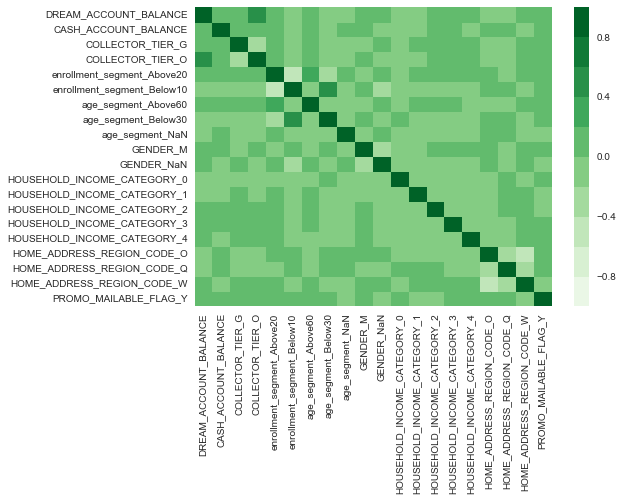

In [31]:
my_cmap2 = ListedColormap(sns.color_palette('Greens', 10).as_hex())
sns.heatmap(X.corr(), vmin=-1, vmax=1, center= 0, cmap= my_cmap2)
plt.show()

In [32]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.132801
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Test_Group   No. Observations:                 8567
Model:                          Logit   Df Residuals:                     8547
Method:                           MLE   Df Model:                           19
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                -0.03269
Time:                        09:37:55   Log-Likelihood:                -1137.7
converged:                       True   LL-Null:                       -1101.7
                                        LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
DREAM_ACCOUNT_BALANCE        3.112e-05   1.66e-05      1.871      0.061   

In [33]:
# Proportional Z-Test to validate p-values
Opt_In_Test = df[(df['CONTROL_FLAG']=='N') & (df['PROMO_MAILABLE_FLAG']=='Y')].UNIQUE_COLLECTOR_ID.count()
print('Number of Users who opt in & in test group: ', Opt_In_Test)

Opt_In = df[df['PROMO_MAILABLE_FLAG']=='Y'].UNIQUE_COLLECTOR_ID.count()
print('Number of Users who opt in: ', Opt_In)

Opt_Out_Test = df[(df['CONTROL_FLAG']=='N') & (df['PROMO_MAILABLE_FLAG']=='N')].UNIQUE_COLLECTOR_ID.count()
print('Number of Users who opt out & in test group: ', Opt_Out_Test)

Opt_Out = df[df['PROMO_MAILABLE_FLAG']=='N'].UNIQUE_COLLECTOR_ID.count()
print('Number of Users who opt out: ', Opt_Out)

Number of Users who opt in & in test group:  8138
Number of Users who opt in:  8371
Number of Users who opt out & in test group:  187
Number of Users who opt out:  196


In [34]:
significance = 0.025
sample_success_a, sample_size_a = (8138, 8371)
sample_success_b, sample_size_b = (187, 196)
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 1.511, p_value: 0.131
Fail to reject the null hypothesis - we have nothing else to say


In [35]:
df[df['HOUSEHOLD_INCOME_CATEGORY']==-1].UNIQUE_COLLECTOR_ID.count()

5167